In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
dataset = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
y_train.shape

(60000,)

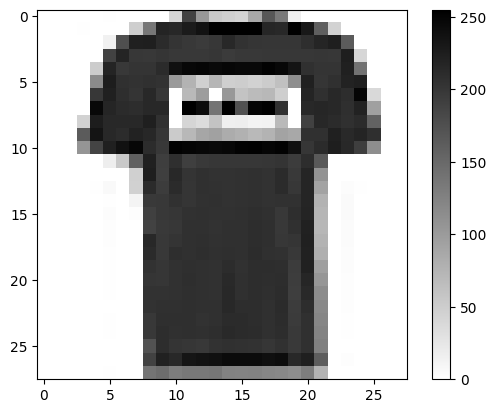

In [5]:
plt.figure()
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = X_train.astype('float32') / 255.0
test_images = X_test.astype('float32') / 255.0

In [7]:
# one-hot encoding untuk label
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
model = tf.keras.Sequential([
    Conv2D(28, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax"),


])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Kompilasi model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "Recall"])

In [10]:
# melatih model
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - Recall: 0.5056 - accuracy: 0.6016 - loss: 2.5975 - val_Recall: 0.7708 - val_accuracy: 0.8319 - val_loss: 0.4549
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - Recall: 0.7479 - accuracy: 0.8090 - loss: 0.5170 - val_Recall: 0.7999 - val_accuracy: 0.8579 - val_loss: 0.3992
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 69ms/step - Recall: 0.7926 - accuracy: 0.8388 - loss: 0.4383 - val_Recall: 0.8328 - val_accuracy: 0.8677 - val_loss: 0.3628
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 77ms/step - Recall: 0.8115 - accuracy: 0.8511 - loss: 0.4005 - val_Recall: 0.8444 - val_accuracy: 0.8790 - val_loss: 0.3324
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 65ms/step - Recall: 0.8251 - accuracy: 0.8604 - loss: 0.3772 - val_Recall: 0.8505 - val_accuracy: 0.8794 - val_loss: 0.3251
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - Recall: 0.8365 - accuracy: 0.8693 - loss: 0.3553 - val_Recall: 0.8547 - val_accuracy: 0.8827 - val_loss:

In [11]:
test_loss, test_acc, test_recall = model.evaluate(X_test,  y_test_one_hot)

print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - Recall: 0.8736 - accuracy: 0.8977 - loss: 0.2871

Test accuracy: 0.8956000208854675


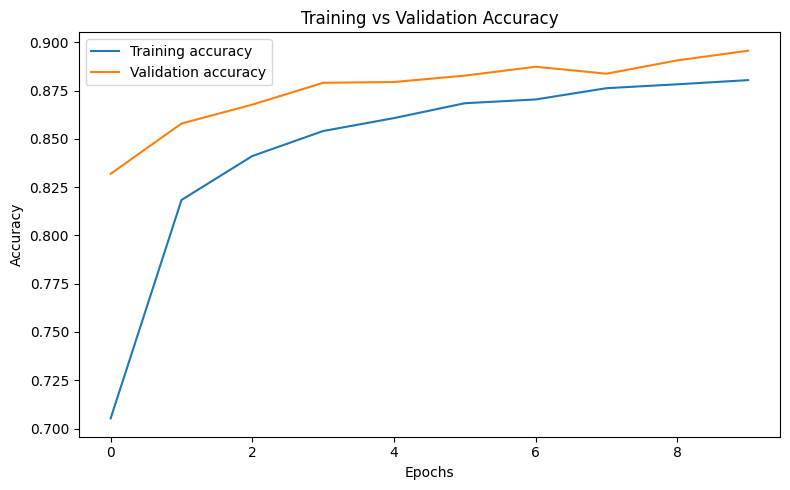

In [12]:
# Visualisasi hasil pelatihan
# plot akurasi
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.tight_layout()
plt.show()

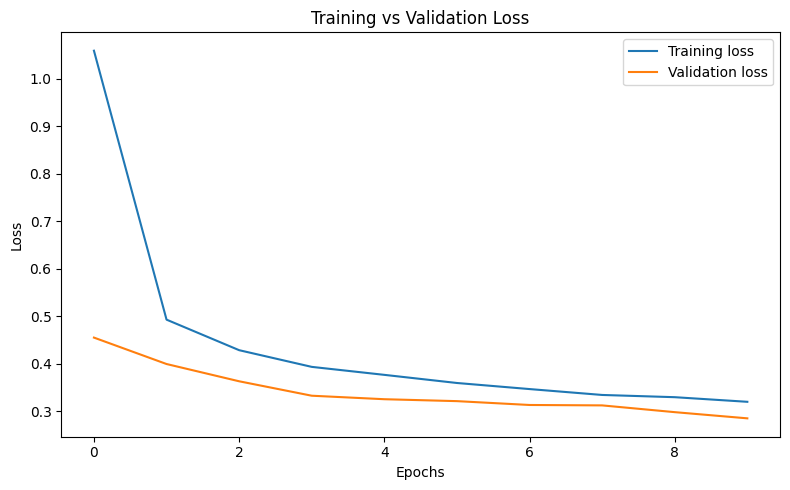

In [13]:
# plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.tight_layout()
plt.show()

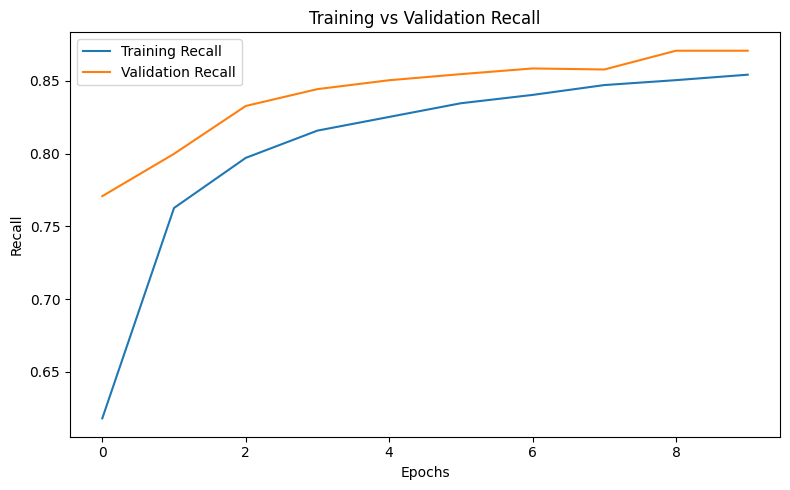

In [17]:
# plot Recall
plt.figure(figsize=(8, 5))
plt.plot(history.history['Recall'], label="Training Recall")
plt.plot(history.history['val_Recall'], label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()
plt.title("Training vs Validation Recall")
plt.tight_layout()
plt.show()

Prediksi dari beberapa gambar dari data uji
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


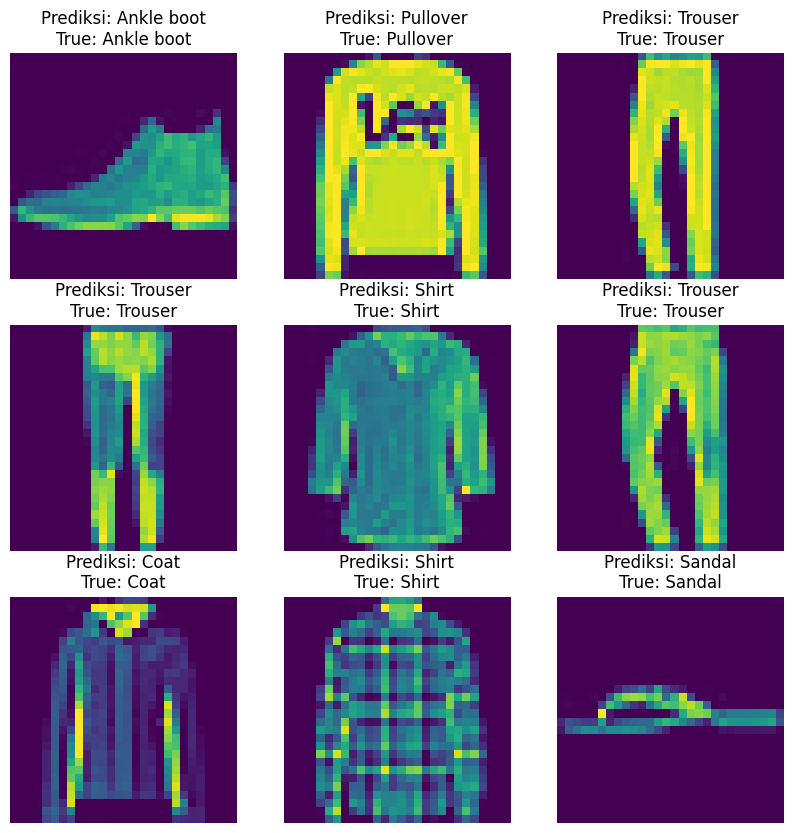

In [42]:
# menampilkan prediksi pada data uji
def show_prekdiksi():
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_test[i])
        pred_class = np.argmax(model.predict(X_test[i:i+1])) # prediksi kelas
        true_class = y_test[i]
        plt.title(f"Prediksi: {class_names[pred_class]}\nTrue: {class_names[true_class]}")
        plt.axis("off")
    plt.show()

print("Prediksi dari beberapa gambar dari data uji")
show_prekdiksi()